In [1]:
import matplotlib.pyplot as plt
import numpy as np
import flow_vis
import rawpy
from skimage import exposure
from scipy.signal import convolve, fftconvolve
from skimage.filters import gaussian

from open_utils import open_burst_of_frames
from alignment import process_alignment
from robustness import RobustnessProcessor

In [2]:
directory='./imgs6'
img_indices = (1, 6)
base_index = 1
up = 1700
down = 2000
left = 500
right = 800

In [3]:
imgs, raw_info = open_burst_of_frames(
    directory=directory,
    img_indices=img_indices,
    up=up,
    down=down,
    left=left,
    right=right,
)

base_img, extra_img = imgs[0], imgs[-1]

In [4]:
flows = process_alignment([base_img, extra_img], base_index=0)
flow = flows[-1]
rp = RobustnessProcessor(size_for_min=3)
robustness_mask = rp.get_robustness_mask(base_img.astype(np.float32), extra_img.astype(np.float32), flow)

alignment for shape (300, 300, 3) taken 1.40999436378479 seconds
alignment for shape (300, 300, 3) taken 1.4723165035247803 seconds


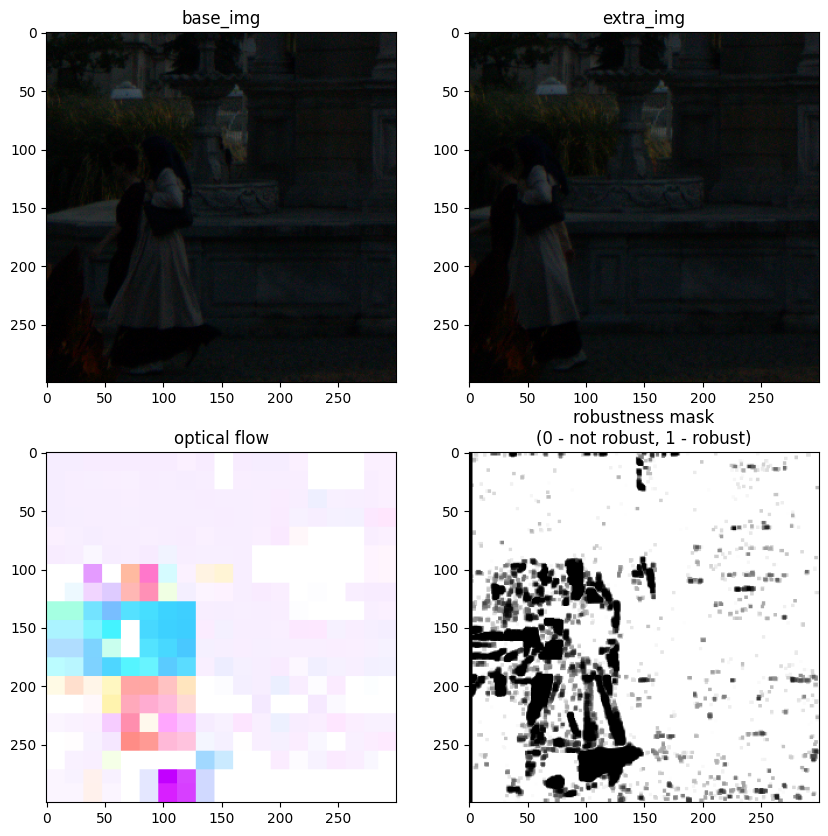

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0][0].imshow(base_img)
axes[0][0].set_title('base_img')
axes[0][1].imshow(extra_img)
axes[0][1].set_title('extra_img')
axes[1][0].imshow(flow_vis.flow_to_color(flow, convert_to_bgr=False))
axes[1][0].set_title('optical flow')
axes[1][1].imshow(robustness_mask, cmap='gray')
axes[1][1].set_title('robustness mask\n(0 - not robust, 1 - robust)')
plt.show()
